In [95]:
from matplotlib import pyplot as plt
import pandas as pd
import requests

In [96]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [24]:
def get_deaths_per_week(geo, year, weeks = range(2,53)):

    string_of_weeks = '&time='.join([f'{year}W{week:02}' for week in weeks])
    url = f'http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/demo_r_mweek3?geo={geo}&unit=NR&sex=T&age=TOTAL&time={string_of_weeks}'

    response = requests.get(url).json()
    
    result = {}
    
    for week, index in response['dimension']['time']['category']['index'].items():
        if str(index) in response['value']:
            result[int(week[-2:])] = response['value'][str(index)]

    return result

In [76]:
sweden = pd.DataFrame(index=range(2, 53))
denmark = pd.DataFrame(index=range(2, 53))
finland = pd.DataFrame(index=range(2, 53))
norway = pd.DataFrame(index=range(2, 53))

for year in [2015, 2016, 2017, 2018, 2019, 2020]:
    sweden[year] = pd.Series(get_deaths_per_week('SE', year))
    denmark[year] = pd.Series(get_deaths_per_week('DK', year))
    finland[year] = pd.Series(get_deaths_per_week('FI', year))
    norway[year] = pd.Series(get_deaths_per_week('NO', year))

In [77]:
sweden['Genomsnitt 2015-2019'] = sweden[[2015,2016,2017,2018,2019]].mean(axis=1)
denmark['Genomsnitt 2015-2019'] = denmark[[2015,2016,2017,2018,2019]].mean(axis=1)
finland['Genomsnitt 2015-2019'] = finland[[2015,2016,2017,2018,2019]].mean(axis=1)
norway['Genomsnitt 2015-2019'] = norway[[2015,2016,2017,2018,2019]].mean(axis=1)

colors = ['#eeeeee','#eeeeee','#eeeeee','#eeeeee','#eeeeee', '#0077b5', '#777777']

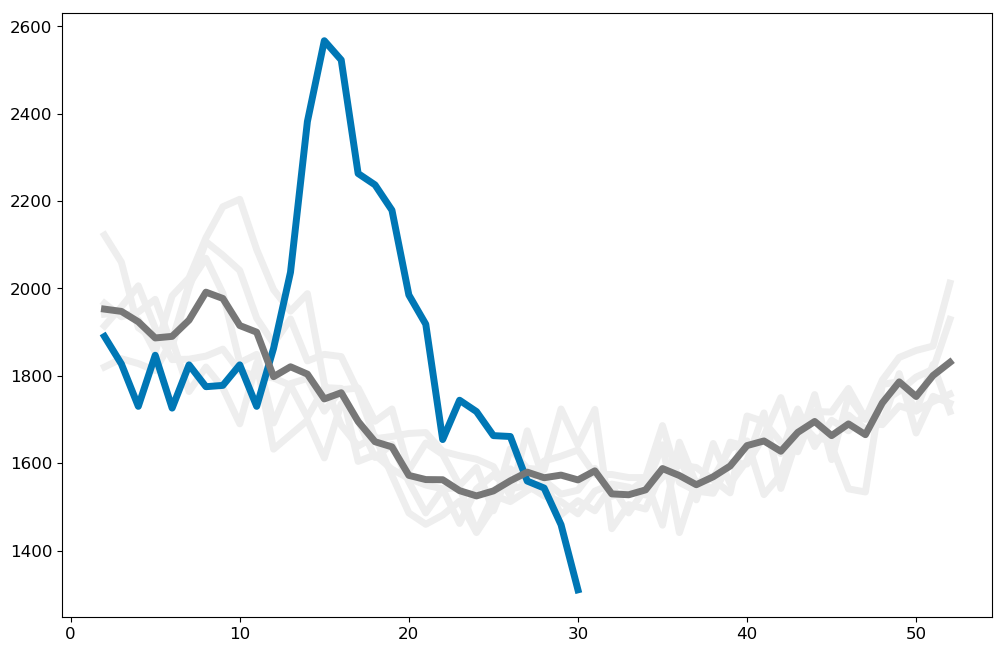

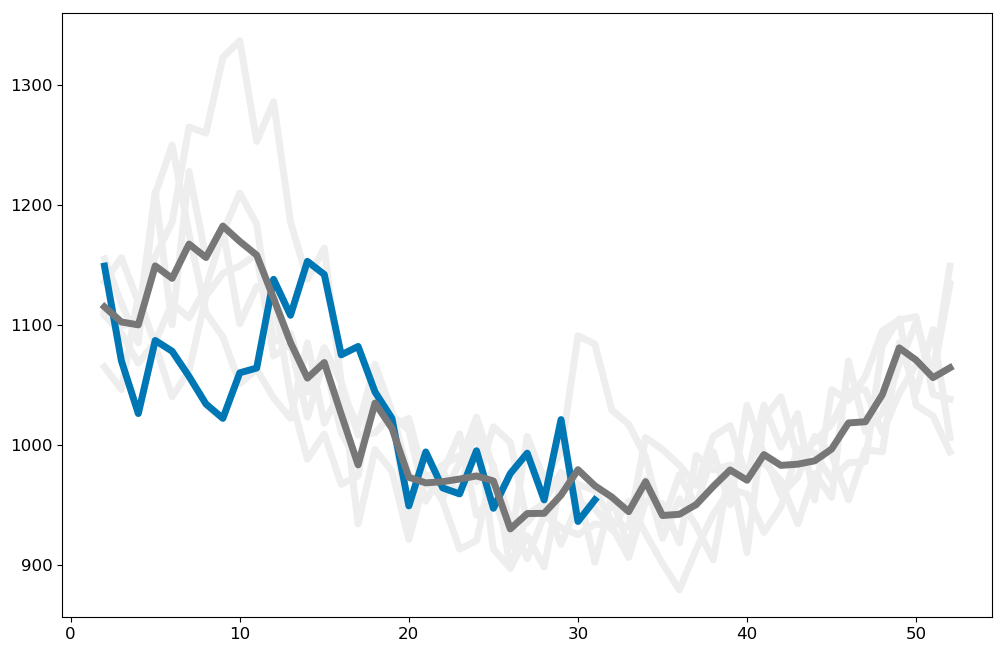

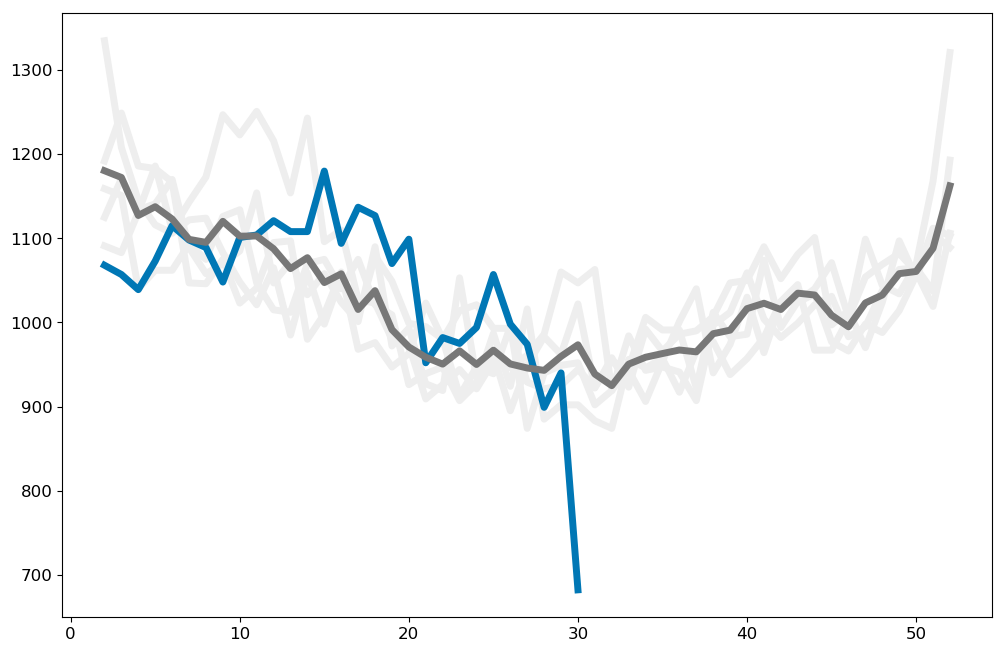

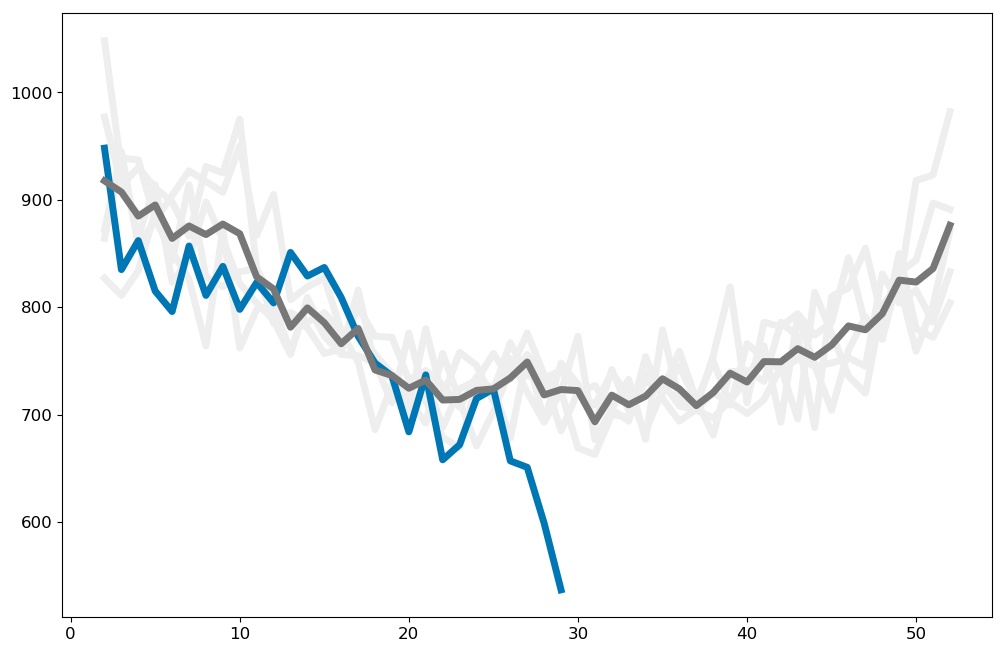

In [102]:
sweden.plot(color=colors,legend=None, linewidth=5)
denmark.plot(color=colors, legend=None, linewidth=5)
finland.plot(color=colors,legend=None, linewidth=5)
norway.plot(color=colors,legend=None, linewidth=5)